In [13]:
# ML & Data Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model & Evaluation
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load Dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ California Housing data loaded successfully.")


✅ California Housing data loaded successfully.


In [15]:
# Train Lasso Regression
lasso = Lasso(alpha=1.0)  # You can tune alpha later
lasso.fit(X_train, y_train)

# Predict
y_pred = lasso.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Lasso MSE:", mse)
print("✅ Lasso R² Score:", r2)


✅ Lasso MSE: 0.9380337514945425
✅ Lasso R² Score: 0.2841671821008398


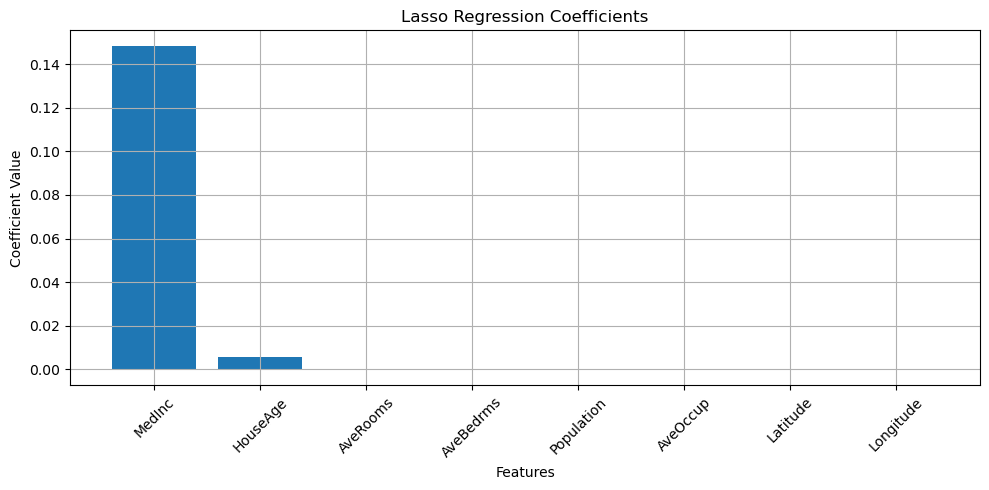

In [17]:
# Plotting Coefficients to visualize which features Lasso kept
plt.figure(figsize=(10, 5))
plt.bar(X.columns, lasso.coef_)
plt.xticks(rotation=45)
plt.title("Lasso Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the model
lasso = Lasso()

# Define search space for alpha (regularization strength)
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV for best alpha
grid = GridSearchCV(lasso, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

# Best model and evaluation
best_lasso = grid.best_estimator_
y_pred = best_lasso.predict(X_test)

# Final Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Best Alpha:", grid.best_params_['alpha'])
print("✅ Lasso MSE:", mse)
print("✅ Lasso R2 Score:", r2)


✅ Best Alpha: 0.01
✅ Lasso MSE: 0.544449158124652
✅ Lasso R2 Score: 0.5845196673976367
